In [118]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# LOGISTIC REGRESSION

In [119]:
df_train = pd.read_csv(r'Data/lr_train.csv')

In [120]:
df_test= pd.read_csv(r'Data/lr_test.csv')

In [121]:
x_train = df_train.drop(columns='default.payment.next.month')
y_train= df_train['default.payment.next.month']
x_test = df_test.drop(columns='default.payment.next.month')
y_test= df_test['default.payment.next.month']

In [122]:
import joblib
loaded_model = joblib.load('logreg.sav')
print(loaded_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=42))])


## Feature Importance

In [123]:
#Feature importance
feature=x_train.columns[:]
values=loaded_model.named_steps['lr'].coef_.round(4)
for i in range(54):
    print(feature[i] + "=" + str(values[0,i]))

LIMIT_BAL=-0.165
PAY_1=0.6766
PAY_2=0.1568
PAY_3=0.099
PAY_4=0.0638
PAY_5=0.0055
PAY_6=-0.0297
BILL_AMT1=0.051
BILL_AMT2=-0.0266
BILL_AMT3=0.027
BILL_AMT4=-0.15
BILL_AMT5=0.3098
BILL_AMT6=-0.1774
PAY_AMT1=-0.1686
PAY_AMT2=-0.2064
PAY_AMT3=-0.0094
PAY_AMT4=-0.0899
PAY_AMT5=-0.0485
PAY_AMT6=0.0246
EDUCATION_1=0.0258
EDUCATION_2=0.0081
EDUCATION_3=-0.0173
EDUCATION_4=-0.0872
SEX_1=0.0333
SEX_2=-0.0333
MARRIAGE_1=0.0414
MARRIAGE_2=-0.0382
MARRIAGE_3=-0.0139
BINNED_AGE_21-25=-0.0054
BINNED_AGE_25-28=-0.038
BINNED_AGE_28-30=-0.0229
BINNED_AGE_30-32=-0.0239
BINNED_AGE_32-35=-0.0097
BINNED_AGE_35-39=0.0078
BINNED_AGE_39-42=0.0194
BINNED_AGE_42-48=0.0165
BINNED_AGE_48-79=0.0559
AVG_BILL_AMT=0.0064
AVG_PAY_AMT=-0.1527
LIMIT_UTIL1=-0.3716
PERC_PAID1=0.0096
LIMIT_UTIL2=0.0661
PERC_PAID2=0.038
LIMIT_UTIL3=0.0677
PERC_PAID3=0.0181
LIMIT_UTIL4=0.0577
PERC_PAID4=0.013
LIMIT_UTIL5=-0.1296
PERC_PAID5=0.0551
LIMIT_UTIL6=0.1771
PERC_PAID6=-0.0109
EXCEEDED_LIMIT=0.0746
OVERPAID=0.0259
NEG_BILL=0.0197


## LOCO

In [172]:
import joblib
loaded_model = joblib.load('logreg.sav')
print(loaded_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=42))])


In [173]:
from sklearn.model_selection import LeaveOneOut

In [174]:
from lofo import LOFOImportance, Dataset, plot_importance

In [175]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=3)

In [176]:
target='default.payment.next.month'

In [177]:
dataset = Dataset(df=df_test, target='default.payment.next.month', features=[col for col in df_train.columns if col != target])

In [182]:
lofo_imp = LOFOImportance(dataset,cv=cv,model=loaded_model,scoring="f1_macro")

In [183]:
importance_df1 = lofo_imp.get_importance()

In [184]:
importance_df1.head(20)

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2
1,PAY_1,0.067438,0.008773,0.078481,0.066812,0.057020
40,PERC_PAID1,0.002320,0.000266,0.002200,0.002688,0.002071
39,LIMIT_UTIL1,0.001871,0.001477,0.003877,0.001372,0.000364
12,BILL_AMT6,0.001308,0.000277,0.001670,0.000998,0.001256
49,LIMIT_UTIL6,0.001115,0.000859,0.002090,0.000000,0.001256
46,PERC_PAID4,0.000912,0.000726,0.001777,0.000000,0.000959
53,NEG_BILL,0.000820,0.000610,0.001463,0.000998,0.000000
41,LIMIT_UTIL2,0.000782,0.000948,-0.000315,0.001998,0.000662
14,PAY_AMT2,0.000681,0.000482,0.001044,0.000998,0.000000
16,PAY_AMT4,0.000592,0.000838,0.001777,0.000000,0.000000


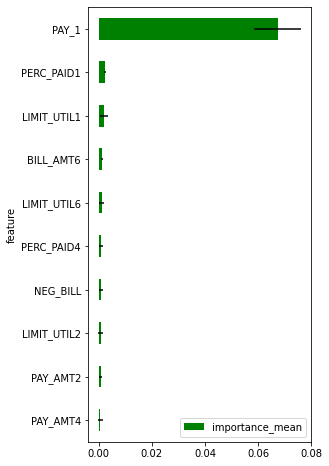

In [185]:
plot_importance(importance_df1[0:10], figsize=(4, 8))

# Random forest

In [156]:
df_train = pd.read_csv(r'Data/rf_train.csv')

In [157]:
df_test = pd.read_csv(r'Data/rf_test.csv')

In [158]:
import joblib
loaded_model = joblib.load('rf.sav')
print(loaded_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        min_samples_split=4, random_state=7))])


In [159]:
from sklearn.model_selection import LeaveOneOut
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.model_selection import KFold
cv = KFold(n_splits=3)
target='default.payment.next.month'

In [160]:
dataset = Dataset(df=df_test, target='default.payment.next.month', features=[col for col in df_train.columns if col != target])

In [168]:
lofo_imp = LOFOImportance(dataset,cv=cv,model=loaded_model,scoring="roc_auc")

In [169]:
importance_df2 = lofo_imp.get_importance()

In [186]:
importance_df2.head(20)

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2
1,PAY_1,0.028132,0.004681,0.033984,0.027885,0.022526
15,PAY_AMT3,0.001712,0.001034,0.000623,0.003102,0.001412
7,BILL_AMT1,0.000939,0.000379,0.001428,0.000505,0.000884
41,LIMIT_UTIL2,0.000869,0.002211,0.003879,-0.001370,0.000099
5,PAY_5,0.000487,0.000947,0.001068,-0.000849,0.001241
39,LIMIT_UTIL1,0.000446,0.001361,0.001707,0.001075,-0.001443
18,PAY_AMT6,0.000371,0.000786,0.000425,-0.000617,0.001306
22,EDUCATION_4,0.000147,0.000369,-0.000040,0.000661,-0.000181
2,PAY_2,-0.000014,0.003021,0.000008,0.003674,-0.003725
16,PAY_AMT4,-0.000016,0.001239,0.000324,0.001302,-0.001675


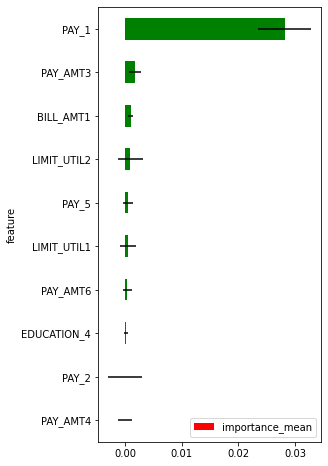

In [171]:
plot_importance(importance_df2[0:10], figsize=(4, 8))

# XGBOOST

In [79]:
df_train = pd.read_csv(r'Data/cc_train.csv')

In [80]:
df_test = pd.read_csv(r'Data/cc_test.csv')

In [81]:
import joblib
loaded_model = joblib.load('xgb.sav')
print(loaded_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=2.212626851837828,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.022713751443330703,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=1,
                               min_child_weights=1.8717298505312536,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=16, num_parallel_tree=1,
                               random_state=0, reg_alpha=0.0190204198581071,
                               reg_lambda=0.0927534352370206,
                               scale_pos_weight=1, s

In [86]:
from sklearn.model_selection import LeaveOneOut
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.model_selection import KFold
cv = KFold(n_splits=2)
target='default.payment.next.month'

In [87]:
dataset = Dataset(df=df_test, target='default.payment.next.month', features=[col for col in df_train.columns if col != target])

In [88]:
lofo_imp = LOFOImportance(dataset,cv=cv,model=loaded_model,scoring="f1_macro")

In [89]:
importance_df3 = lofo_imp.get_importance()

[16:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[16:20:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:20:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

In [90]:
importance_df3.head(20)

,feature,importance_mean,importance_std,val_imp_0,val_imp_1
1,PAY_1,0.046374,0.003611,0.042763,0.049984
59,OVERPAID,0.006804,0.000278,0.006526,0.007082
54,LIMIT_UTIL5,0.006526,0.004980,0.001547,0.011506
43,BINNED_AGE_48-79,0.005521,0.000190,0.005331,0.005712
29,EDUCATION_4,0.004561,0.001102,0.003459,0.005664
45,AVG_PAY_AMT,0.004518,0.000033,0.004485,0.004552
27,EDUCATION_2,0.004296,0.001481,0.002815,0.005777
33,MARRIAGE_2,0.004121,0.001757,0.005878,0.002364
3,PAY_3,0.003947,0.000623,0.003324,0.004571
4,PAY_4,0.003749,0.002859,0.000890,0.006608


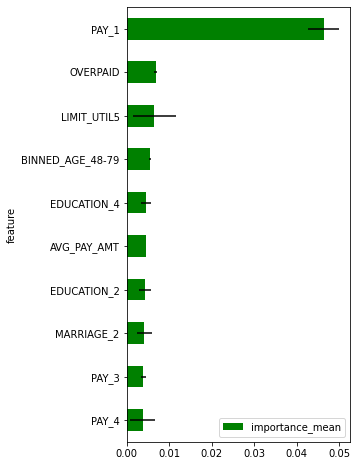

In [91]:
plot_importance(importance_df3[0:10], figsize=(4, 8))